<a href="https://colab.research.google.com/github/ShashwatVv/naiveDL/blob/main/CNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.signal import convolve2d
from imageio import imread

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

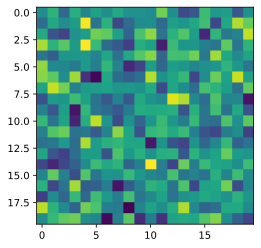

In [3]:
## performing convolution

imgN = 20 ## dimension n--> for  an image[let's consider nXn for now]
image = np.random.randn(imgN, imgN)
plt.imshow(image)


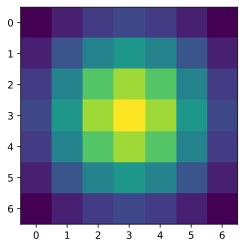

In [4]:
## creating a gaussian kernel
##First let's create Y and X 
len_kernel = 7
Y,  X  = np.meshgrid(np.linspace(-3, 3, len_kernel), np.linspace(-3, 3, len_kernel))
##A gaussian kernel now
kernel = np.exp(-(X**2+Y**2)/len_kernel)
plt.imshow(kernel)

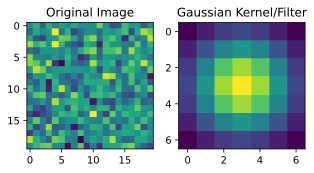

In [5]:
##Plotting these side by side
fig, axes = plt.subplots(1, 2, figsize=(5,7))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[1].imshow(kernel)
axes[1].set_title("Gaussian Kernel/Filter")
plt.show()


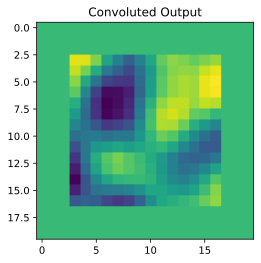

In [6]:
##Let's create output with all zeros
output_img = np.zeros((imgN, imgN))
h = len_kernel//2

for rowi in range(h, imgN-h):
  for coli in range(h, imgN-h):
    ## piece by piece
    image_piece = image[rowi-h:rowi+h+1,:] ## selected rows
    ##but still this piece has lots of extra columns
    image_piece = image_piece[:,coli-h:coli+h+1] ##selected columns

    ##perform convolution, i.e, dot product with inverted kernel
    dot_p = np.sum(image_piece*kernel[::-1, ::-1])
    output_img[rowi,coli] = dot_p

plt.imshow(output_img)
plt.title("Convoluted Output")
plt.show()

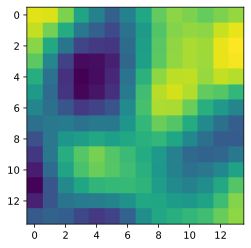

In [7]:
## Finding output with convoluttion function in scipy
output_conv = convolve2d(image, kernel, mode='valid')
plt.imshow(output_conv)

In [15]:
##
tajImage = imread('https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Taj_Mahal%2C_Agra%2C_India_edit3.jpg/375px-Taj_Mahal%2C_Agra%2C_India_edit3.jpg')

In [16]:
tajImage.shape

(259, 375, 3)

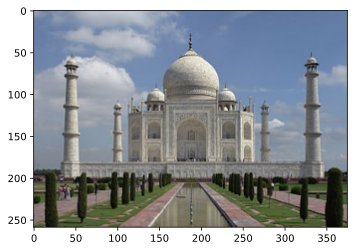

In [17]:
plt.imshow(tajImage)

In [18]:
## Taking mean across the third axis, i.e, the rgb channel
tajImage = np.mean(tajImage, axis=2)
tajImage = tajImage/np.max(tajImage) ##standardize

tajImage.shape

(259, 375)

In [24]:
def multiplot(across, image_list, title_list, size=(4,6)):
  r, c = across
  fig, ax = plt.subplots(r, c, figsize=size)
  for x in range(len(image_list)):
    ax[x].imshow(image_list[x])
    ax[x].set_title(title_list[x])
  
  plt.show()


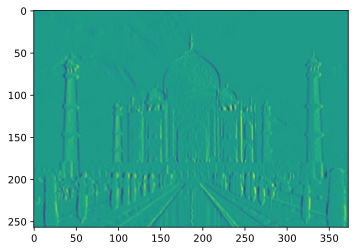

In [20]:
## We will be creating two kernels:
##Horizontal Kernel
h_kernel  =np.array([
                     [1,0,-1],
                     [1,0,-1],
                     [1,0,-1]
]) 

v_kernel  =np.array([
                     [1,1,1],
                     [0,0,0],
                     [-1,-1,-1]
]) 

## Caveat to  consider: sum of all the values in kernel is 0 -->  IN DL although it won't matter, as it
## will be learned by the algorithm itself

horizontal_conv = convolve2d(tajImage, h_kernel, 'valid')


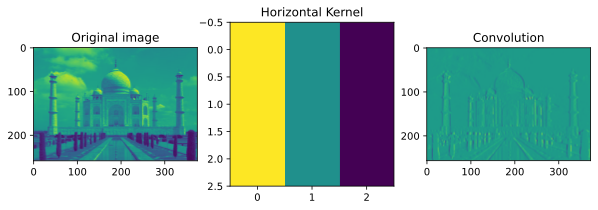

In [29]:
imageList = [tajImage, h_kernel, horizontal_conv]
titleList = ['Original image', 'Horizontal Kernel', 'Convolution']
size  = (10,6)
multiplot((1,3), imageList, titleList, size)

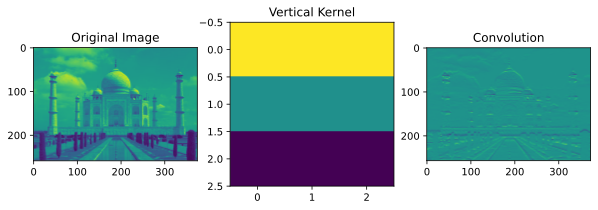

In [28]:
## convolution with vertical kernel
vertical_conv = convolve2d(tajImage, v_kernel, 'valid')
imageList = [tajImage, v_kernel, vertical_conv]
titleList = ["Original Image", "Vertical Kernel", "Convolution"]
size = (10,6)

multiplot((1,3), imageList, titleList, size)

In [21]:
## My idea of infinite loop :D ---> theoretically converges at 10^4000 something :o 
sum = 0
i = 2
while(sum<=10):
  sum +=1/(i*np.log(i))
  i +=1

print("Num of iteration: ", i-1)

KeyboardInterrupt: ignored